In [1]:
import importlib.util
if importlib.util.find_spec('empylib') is None:
    !pip install git+https://github.com/PanxoPanza/empylib.git

# Transporte Radiativo

## Introducción

En la [unidad 2](../02_ondas_EM_en_la_materia/02_ondas_EM_en_la_materia.ipynb) revisamos el efecto de interferencia en películas de espesor finito, y como está daba lugar a la coloración tornasol caractéristica en derrames de aceites en agua, lentes y discos compactos.

<img src="./images/interference_oils.png" width="700px" align= center>

Si, teóricamente, el efecto de interferencia ocurre cada vez que tenemos un tercer material intercalado entre dos materiales (iguales o diferentes). **¿Porqué no visualizamos este efecto en ventanas u otros materiales de gran espesor?**

## Coherencia de la luz e interferencia

Para entender esto, primero debemos revisar la distribución espectral de fuentes reales de luz

<img src="./images/light_source_spectra.png" width="800px" align= center>

Como vemos, una fuente emite luz en varias longitudes de onda y a distinta intensidad. Así, las ondas emitidas se superponen, generando una onda resultante con una forma distinta a $e^{i(\vec{k}\cdot\vec{r} -\omega t)}$.

Consideremos, por ejemplo, una fuente de luz con una distribución espectral normal, centrada en $\lambda_0$ y con una desviación estandar $\pm\sigma_\lambda\lambda_0$, con $\sigma_\lambda \in [0,1]$. Imaginemos esta fuente como $N$ emisores, donde cada emisor $j$ emite una onda electromagnéticas con longitud de onda $\lambda \pm\Delta \lambda_j$, donde $\Delta \lambda_j$ es escogido aleatoriamente a partir de la distribución normal.

<img src="./images/normal_distribution.png" width="400px" align= center>

Asumiendo ondas en el aire en dirección $\hat{k} = \hat{x}$, el campo eléctrico resultante es:

\begin{equation*}
\vec{E}_\mathrm{tot} = \sum_j^N E_0e^{i\left(k_jx - \omega_j t\right)} \hat{z},
\end{equation*}

donde $k_j = \frac{2\pi}{\lambda \pm\Delta \lambda_j}$, y $\omega_j = c_0k_j$

Analicemos el comportamiento de $\vec{E}_\mathrm{tot} /E_0$ para $\lambda_0 = 500$ nm

In [2]:
import numpy as np
from numpy.random import normal
import matplotlib.pyplot as plt

def light_packet(kdir, x, t, lam, sig, N):
    c0 = 3E8          # velocidad de la luz (m/s)
    xx = np.meshgrid(x,np.ones(N))[0]
    
    # Generamos arreglo de ondas aleatorias
    dlamj =  normal(0, lam*sig,N)
    kj = (2*np.pi/(lam + dlamj)).reshape(-1,1)
    wj = c0*kj
    Erand = np.exp(1j*(kdir*kj*xx-wj*t)) 
    
    # Sumamos todas las ondas
    return np.sum(Erand,axis=0)
 
def plot_light_packet(N, t, sig):
    '''
    n: número de ondas generadas
    t: tiempo en ns
    sig: % de ancho de banda (dlam = sig*lam)
    '''
    lam = 0.5         # longitud de onda (um)
    t = t*1E-9 # convertimos ns a s
    
    # recorrido de la onda
    x = np.linspace(-2,2,1000)  # desde 0 a 4 micrones
    E = light_packet(1, x, t, lam, sig, N)
    
    # Graficamos
    fig, ax = plt.subplots()
    fig.set_size_inches(6, 3)
    plt.rcParams['font.size'] = '12'
    
    ax.plot(x,np.real(E), 'k')
    ax.set_xlabel('x ($\mu$m)')
    ax.set_ylabel('Amplitud $|E|/E_0$')
    ax.set_ylim(-N*1.1,N*1.1)
    ax.grid()


In [3]:
from ipywidgets import interact

@interact( N=(1,1000,1), 
           t=(-10,10,0.1),
           sig=(0,1,0.01))
def g(N=1000, t=0, sig=0.3):
    return plot_light_packet(N,t,sig)

interactive(children=(IntSlider(value=1000, description='N', max=1000, min=1), FloatSlider(value=0.0, descript…

### Longitud de coherencia
Definimos como **longitud de coherencia**, $l_c$, a la distancia donde un grupo de ondas electromagnética mantiene correlación entre las fases. Dos puntos en una paquete de onda separados a una distancia mayor a $l_c$ son incoherentes, es decir, no están correlacionados

<img src="./images/coherence_length.png" width="300px" align= center>

<center>Esquema de un paquete de onda emitido por una fuente con longitud de coherencia $l_c$</center>

La relación entre $l_c$, la longitud de onda central $\lambda$ y el ancho de banda $\Delta\lambda$ está dado, aproximadamente, por la relación:

\begin{equation*}
l_c \approx \frac{\lambda^2}{n\Delta \lambda},
\end{equation*}

donde $n$ es el indice de refracción del medio donde se propaga la luz.

Por ejemplo, para lasers He-Ne (laser rojo)  $l_c\approx 0.2 - 100$ m.  

Para radiación emitida por un cuerpo a temperatura $T$, la longitud de coherencia está dada por:

\begin{equation*}
l_c T = 2167.8~\mathrm{\mu m~K}
\end{equation*}

Así, por ejemplo, la radiación solar ($T \approx 5800~\mathrm{K}$) tiene una longitud de coherencia, $l_c \approx 370~\mathrm{nm}$

### Régimen de trasporte de luz
Los fenómenos de interferencia descritos en las unidades anteriores existen debido a la forma oscilatoria de la luz. **Dos paquetes de ondas distintos son incoherentes, y la superposición de estos no genera interferencia.**

En otras palabras, el fenómeno de interferencia solo existe si el paquete de onda interfiere consigo mismo. Así, podemos concluir que los fenómenos de interferencia en películas de espesor $d$ no serían visibles si $d > l_c$. 

<img src="./images/interference_thinfilm.png" width="200px" align= center>

<center>Propagación de una onda a través de una película de espesor $d$, con $l_c < d$</center>

En general, para una longitud características $d$, la regla es:

- Si $d > l_c$ el **transporte de luz es incoherente** . En este régimen, podemos ignorar las propiedades oscilatorias de la luz, y analizar el problema como el transporte de pequeños paquetes de onda, o simplemente como partículas.

- Si $d < l_c$, el **transporte de luz es coherente**. En este régimen debemos considerar las propiedades oscilatorias a partir de las Ecuaciones de Maxwell.

Así, **los coeficientes de Fresnel para una película delgada solo son aplicables si $d < l_c$.**

Los coeficientes de Fresnel para una interface, en cambio, siempre son válidos debido a que consideran una interface infinitamente delgada.

<img src="./images/interference_interface.png" width="350px" align= center>

<center>Refracción y reflexión de una onda incoherente a través de una interfaz</center>

En medios particulados, los fenómenos de interferencia pueden ocurrir si las partículas están suficientemente cerca y tienen tamaños similares. Llamamos a esto **scattering coherente**

<img src="./images/scattering_coherence.png" width="600px" align= center>

<center>Fenómeno de interferencia en scattering</center>

El fenómeno de scattering coherente da lugar a los denominados **colores estructurales** presentes en las alas de las aves y mariposas (mas info [acá](https://wires.onlinelibrary.wiley.com/doi/10.1002/wnan.1396))

<img src="./images/structural_colors_birds.png" width="550px" align= center>

<center>Colores estructurales en alas de aves</center>

Fuente: [Hwang, V. et al. PNAS 118 (4) e2015551118
 (2020)](https://www.pnas.org/doi/10.1073/pnas.2015551118)

<img src="./images/structural_colors_buterflies.png" width="450px" align= center>

<center>Colores estructurales en alas de mariposa</center>

Fuente: [Tippets C. A. et al. J. Opt. 18 (2016) 065105](https://iopscience.iop.org/article/10.1088/2040-8978/18/6/065105)

## Teoría de transferencia radiativa
Si el transporte de luz es incoherente, podemos ignorar las propiedades oscilatorias de la luz y analizar el fenómeno óptico como un el transporte de radiación a través de un volumen de control.

### Intensidad específica

Definimos como **radiancia espectral o intensidad específica**, $I_\lambda$, al flujo de energía por **ángulo sólido diferencial**, $d\Omega$, para una longitud de onda $\lambda$.

<img src="./images/specific_intensity.png" width="300px" align= center>

El ángulo sólido define el tamaño relativo del área $S$ para un observador en $P$ a una distancia $r$. 

El diferencial está definido por $d\Omega = \sin\theta d\theta d\phi$

<img src="./images/solid_angle.png" width="450px" align= center>

Es importante aclarar que los conceptos intensidad específica y vector de Poynting $\langle\vec{S}\rangle$, son equivalentes: $I_\lambda(\hat{k})$ es un término utilizado en radiometría para definir el flujo de energía por unidad de ángulo sólido, mientras que $\langle\vec{S}\rangle$ es un término utilizado en óptica para describir el flujo de energía en dirección $\hat{k}$. Cabe destacar, sin embargo, que $I_\lambda(\hat{k})$ es una magnitud, y $\langle\vec{S}\rangle$ es un vector. Así, podríamos decir que la relación entre estos dos términos está dada por $I_\lambda(\hat{k}) = \langle\vec{S}\rangle\cdot\hat{k}$.

### Ecuación de transferencia radiativa
La **ecuación de transferencia radiativa** (RTE por sus siglas en ingles), es una ecuación de transporte que describe la propagación de la radiancia espectral, $I_\lambda(\vec{r},\hat{k})$, en función de la posición posición $\vec{r}$ y dirección $\hat{k}$. En su forma más general, para un problema estacionario:

\begin{equation}
\hat{k}\cdot\nabla_r I_\lambda(\vec{r},\hat{k}) = - \left[\frac{f_v}{V_p}C_\mathrm{ext} + 2\kappa k_0\right]I_\lambda(\vec{r},\hat{k}) + \frac{f_v}{V_p}\int_{4\pi} P_\mathrm{sca}(\hat{k},\hat{k}') I_\lambda(\vec{r},\hat{k}') d\Omega'
\end{equation}

donde $f_v$ y $V_p$ son, respectivamente la fracción de volúmen y el volúmen de las partículas en el medio, y $P_\mathrm{sca}(\hat{k},\hat{k}')$ es la función de fase.

Notar que consideramos el caso más generalizado de la función de fase, que depende tanto de la dirección de la radiación incidente $\hat{k}$ como de la dirección del scattering $\hat{k}'$. Ambas definidas por ángulo sólido

En el caso de una esfera, $\hat{k}_\mathrm{sca} = \hat{k}$ y $\hat{k}_\mathrm{inc} = \hat{k}'$. Así, la función de fase depende de $\theta$, el cual está definido por $\cos\theta = \hat{k}\cdot\hat{k}'$



Con esto en mente, ahora podemos discutir el significado de los términos en la RTE:

- El primer término representa el cambio de $I_\lambda(\vec{r},\hat{k})$ a través volumen diferencial. Por ejemplo, en el caso unidimencional en dirección $\hat{k} = \hat{x}$, tenemos: 

\begin{equation*}
\hat{x}\cdot\nabla_r I_\lambda(\vec{r},\hat{k}) = \frac{\partial}{\partial x}I_\lambda(\vec{r},\hat{k})
\end{equation*}

- El segundo término representa la pérdida de energía radiativa, por extinción $\left(\frac{f_v}{V_p}C_\mathrm{ext}\right)$ y absorción en el material material ($2\kappa k_0$), respectivamente. Recordemos que la extinción representa la energía absorbida por las partículas + la energía de scattering en direcciónes distintas a $\hat{k}$, es decir $C_\mathrm{ext}= C_\mathrm{abs} + C_\mathrm{sca}$.

- El tercer término representa la ganancia de energía radiativa produco del scattering inducido por radiación incidente en dirección $\hat{k}'$. Este término representa el fenómeno de **scattering múltiple**.

## Soluciones de la RTE
La ecuación de transferencia radiativa permite explicar de forma fenomenológica el transporte de radiación en un medio particulado. Debido a su complejidad, existen pocas soluciones analíticas. En esta sección describiremos las tres más conocidas.

### Película de material sin partículas (Reflectividad y Transmisividad incoherente)
En el caso de un medio sin partículas solo debemos considerar el primer término de la RTE. 

Para el caso particular de un material de espesor $t_\mathrm{film}$ e índice de refracción $N = n + \kappa$, rodeado por un medio con índice de refracción $N_0$, derivamos las siguientes relaciones de reflectividad y tranmisividad para luz incoherente:

\begin{align}
R_\mathrm{incoh}&= R_0 + \frac{T_0^2R_0e^{-4\kappa k_0 t_\mathrm{film}}}{1 - R_0^2e^{-4\kappa k_0 t_\mathrm{film}}} 
\\[10pt]
T_\mathrm{incoh} &= \frac{T_0^2e^{-4\kappa k_0 t_\mathrm{film}}}{1 - R_0^2e^{-4\kappa k_0 t_\mathrm{film}}}
\end{align}

donde $R_0$ y $T_0$ corresponden, respectivamente, a la reflectividad y transmisividad en la interface $N_0 / N_1$

En el siguiente ejemplo, utilizamos la función ```incoh_multilayer``` de la libreria ```empylib.waveoptics```. Esta función es más general que la ecuación anterior y permite determinar $R_\mathrm{incoh}$ y $T_\mathrm{incoh}$ para arreglos multicapas. 

En este caso, evaluaremos una película de sílice de espesor $1~\mu\mathrm{m}$, sobre un sustrato con íncide de refracción $N_\mathrm{back} = 4.3$, y con aire en la superficie $N_\mathrm{front} = 1.0$. El espectro de longitudes de onda $\lambda\in[0.3,0.8]~\mu\mathrm{m}$ y el ángulo de incidencia $\theta_i = 30°$. Para comparar, determinaremos $R$ y $T$ para el caso de luz coherente.

In [4]:
import numpy as np
import empylib.waveoptics as wv
import empylib.nklib as nk

lam = np.linspace(0.3,0.8,100)  # espectro de longitudes de onda (um)
theta = np.radians(30)          # ángulo de incidencia

Nfront = 1.0                 # índice de refracción medio superior
N1     = 1.5                 # índice de refracción capa delgada
Nback  = 4.3                 # índice de refracción medio inferior
N = (Nfront, N1, Nback)      # indices de refracción (above, mid, below)
d = 1.0                      # espesor capa intermedia (um)

# caso luz incoherente
Rp_incoh, Tp_incoh = wv.incoh_multilayer(lam,theta, N, d, pol='TM')
# caso luz coherente
Rp, Tp = wv.multilayer(lam,theta, N, d, pol='TM')[:2]

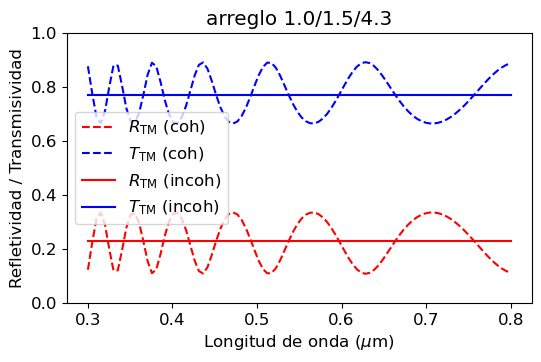

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(6, 3.5)
plt.rcParams['font.size'] = '12'

# Graficamos el flujo de energía
plt.plot(lam,Rp,'--r',label='$R_\mathrm{TM}$ (coh)')
plt.plot(lam,Tp,'--b',label='$T_\mathrm{TM}$ (coh)')
plt.plot(lam,Rp_incoh,'-r',label='$R_\mathrm{TM}$ (incoh)')
plt.plot(lam,Tp_incoh,'-b',label='$T_\mathrm{TM}$ (incoh)')
plt.title('arreglo 1.0/1.5/4.3')
plt.xlabel('Longitud de onda ($\mu$m)')
plt.ylabel('Refletividad / Transmisividad')
plt.ylim(0,1)
plt.legend()
plt.show()

En la figura, para el caso de luz coherente, notamos oscilaciones en $R$ y $T$ producto de los fenómenos de interferencia. En el caso de luz incoherente, el fenómeno de interferencia desaparace.

### Película de material con baja concentración de partículas (Ley de Beer-Lambert)
Definimos el **camino libre medio de scattering**, como $\Lambda_\mathrm{sca} = \left(f_v C_\mathrm{sca}/V_p\right)^{-1}$. Este parametro representa la distancia promedio que recorre la luz entre eventos de scattering.

Si $\Lambda_\mathrm{sca}$ es mayor que el espesor del material, $t_\mathrm{film}$, la probabilidad de que ocurran más de un evento scattering es despreciable, y decimos que el **scattering es de primer orden**. En este caso, el tercer término de la RTE es despreciable y la radiación solo pierde energía por absorción del material o extinción inducida por las partículas.

La solución a esta ecuación se conoce como la ley de Beer-Lambert. Mediante esta aproximación podemos deducir las componentes total y especular de la transmitancia:

\begin{equation}
T_\mathrm{tot} = T_0 e^{-f_v\frac{C_\mathrm{abs}}{V_p}t_\mathrm{film}}\quad\quad\mathrm{and}\quad\quad 
T_\mathrm{spec} = T_0 e^{-f_v\frac{C_\mathrm{ext}}{V_p}t_\mathrm{film}}
\end{equation}

donde, $T_0$ es la **transmisividad incoherente del material sin incrustaciones**.

<img src="./images/beer_lambert.png" width="500px" align= center>

<center>Transporte de luz en un medio con scattering de primer orden</center>

Podemos utilizar la ley de Beer-Lambert para analizar, de forma aproximada, el efecto del color del cielo durante el día y en la tarde.

El color del cielo está dado por la componente difusa. Así calculamos $T_\mathrm{dif} = T_\mathrm{tot} - T_\mathrm{spec}$.

Consideremos una atmosfera compuesta de aire ($N_h = 1.0$) y una pequeña concentración ($f_v = 1\times 10^{-6}~\%$) de partículas de 10 nm de diámetro e índice de refracción $N_p = 1.5$. El espesor de la atmosfera es $t_\mathrm{atm} = 100~\mathrm{km}$

In [6]:
import empylib.rad_transfer as rt
import empylib.nklib as nk
import numpy as np
import matplotlib.pyplot as plt
from empylib.ref_spectra import AM15, Bplanck
from empylib.ref_spectra import color_system as cs
cs = cs.hdtv

lam1 = np.linspace(0.38,0.78,100) # espectro de longitudes de onda
cs.interp_internals(lam1)
def plot_atmosphere(theta_sun):
    fig, ax = plt.subplots()          
    fig.set_size_inches(6, 4)         # Tamaño del gráfico
    plt.rcParams['font.size'] = '12'  # tamaño de  fuente
    
    # parámetros de entrada
    tatm = 100E6                      # espesor de la atmósfera en mm
    N = (1.0,1.0,1.0)                 # indice de refracción superior, intermedio e inferior
    fvp = 1E-8                        # fracción de volúmen de las partículas
    Dp = 0.010                        # diámetro de las partículas
    Np = 1.5                          # índice de refracción de las partículas
    
    # transmitancia total y especular|
    theta = np.radians(theta_sun)    # posición del sol en radianes
    Ttot, Rtot, Tspec = rt.T_beer_lambert(lam1,theta,tatm,N,fvp,Dp,Np)
    
    Tdif = Ttot - Tspec              # transmitancia difusa
    ax.plot(lam1,Tdif,'-k',label = 'Tdif')
    ax.set_xlabel('Longitud de onda ($\mu$m)')
    ax.set_ylabel('Transmisividad')
    ax.set_title(r'Posición del sol, $\theta_\mathrm{sun}$=%.1f°'% (theta_sun))
    ax.set_ylim(0,1.05)
    
    Dcircle = 0.25
    ax2 = fig.add_axes([0.11,0.15, Dcircle, Dcircle])
    Irad = Tdif*Bplanck(lam1,5777)
    html_rgb = cs.spec_to_rgb(Irad, out_fmt='html')
    Circle = plt.Circle((0, 0), Dcircle, color=html_rgb)
    ax2.add_patch(Circle)
    ax2.set_aspect('equal')
    ax2.set_xlim(-Dcircle*1.2,Dcircle*1.2)
    ax2.set_ylim(-Dcircle*1.2,Dcircle*1.2)
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.set_facecolor('k')
    plt.show()

In [7]:
from ipywidgets import interact

@interact(theta_sun=(0,89.99,0.1))
def g(theta_sun=0):
    return plot_atmosphere(theta_sun)

interactive(children=(FloatSlider(value=0.0, description='theta_sun', max=89.99), Output()), _dom_classes=('wi…

### Pelicula de material particulado (simulaciones de transferencia radiativa)
Este caso corresponde a materiales con $\Lambda_\mathrm{sca} < t_\mathrm{film}$. En este caso los eventos de scattering se producen más de una vez, y decimos que estámos en un régimen de **scattering múltiple**. Como resultado, los tres términos de la RTE son relevantes y debemos resolver la ecuación mediante simulación computacional.

<img src="./images/multiple_scattering.png" width="400px" align= center>

<center>Transporte de luz en un medio con scattering múltiple</center>

Analicemos la [copa de Licurgo](https://es.wikipedia.org/wiki/Copa_de_Licurgo), considerando un material de sílice de espesor $t_\mathrm{film} = 5~\mathrm{mm}$ con incrustaciones de partículas de plata de forma esférica.

Evaluaremos los colores de este material en transmisión y reflexión para luz incidente normal a la superficie en función de la concentración y el diámetro de las partículas. Utilizamos la función ```adm_sphere``` de la librería ```empylib.rad_transfer```

In [8]:
import empylib.rad_transfer as rt
import empylib.nklib as nk
import empylib.miescattering as mie
import numpy as np
import matplotlib.pyplot as plt

lam2 = np.linspace(0.3,1.0,100) # espectro de longitudes de onda en micrometros
Nlayers = (1.0,1.5,1.0)         # indice de refracción superior, intermedio e inferior
Np = nk.silver(lam2)            # Índice de refracción de las partículas
cs.interp_internals(lam2)

def plot_glass_silver(fv,D):
    # parámetros de entrada
    
    theta = np.radians(0)       # 0 grados en radianes
    tfilm = 5                   # espesor en milímetros
    
    fv = fv*1E-7                # fracción de volúmen de las partículas
    D = D*1E-3                  # diámetro de las partículas
    
    qext, qsca = mie.scatter_efficiency(lam2,Nlayers[1],Np,D)[:2]
    qabs = qext - qsca
    Ttot, Rtot = rt.adm_sphere(lam2,tfilm,Nlayers,fv,D,Np)[:2]

    fig, ax = plt.subplots(1,3)
    fig.set_size_inches(12, 3)
    plt.rcParams['font.size'] = '10'
    
    ax[0].plot(lam2,qsca,'-r',label='$C_\mathrm{sca} A_c$')
    ax[0].plot(lam2,qabs,'-b',label='$C_\mathrm{abs} A_c$')
    ax[0].set_xlabel('Longitud de onda ($\mu$m)')
    ax[0].set_ylabel('Eficiencia transversal')
    ax[0].set_title('Partícula de plata (D=%.0f nm)' % (D*1E3))
    ax[0].legend()
    ax[0].set_ylim(0,10)
    
    ax[1].plot(lam2,Rtot,'-r',label = 'Rtot')
    ax[1].plot(lam2,Ttot,'-b',label = 'Ttot')
    ax[1].set_xlabel('Longitud de onda ($\mu$m)')
    ax[1].set_ylabel('Transmisividad')
    ax[1].set_title(r'Sílice con plata (fv = %.3e %%)' % (fv*100) )
    ax[1].legend()
    ax[1].set_ylim(0,1)

    Dcircle = 0.20
    html_rgb = cs.spec_to_rgb(Ttot*AM15(lam2), out_fmt='html')
    Circle = plt.Circle((0, 0), Dcircle, color=html_rgb)
    ax[2].add_patch(Circle)
    ax[2].annotate('Luz Transmitida', xy=(0, 0), va='center', ha='center')

    html_rgb = cs.spec_to_rgb(Rtot*AM15(lam2), out_fmt='html')
    Circle = plt.Circle((Dcircle*1.2*2, 0), Dcircle, color=html_rgb)
    ax[2].add_patch(Circle)
    ax[2].annotate('Luz Reflejada', xy=(Dcircle*1.2*2, 0), va='center', ha='center')

    ax[2].set_aspect('equal')
    ax[2].set_xlim(-Dcircle*1.2,Dcircle*1.2*3)
    ax[2].set_ylim(-Dcircle*1.2,Dcircle*1.2)
    ax[2].set_xticks([])
    ax[2].set_yticks([])
    ax[2].set_facecolor('k')
    plt.subplots_adjust(wspace=0.3)
    plt.show()

In [9]:
from ipywidgets import interact

@interact(fv=(1,100,1), D = (10,200,1))
def g(fv=20, D = 70):
    return plot_glass_silver(fv,D)

interactive(children=(IntSlider(value=20, description='fv', min=1), IntSlider(value=70, description='D', max=2…

Cuando la concentración de partículas es densa, el medio se vuelve opaco. Este régimen se denomina **scattering difuso** y permite explicar, entre otras cosas, el color de las nubes o la pintura blanca

<img src="./images/diffuse_scattering.png" width="400px" align= center>

<center>Transporte de luz en un medio con scattering difuso</center>

Un ejemplo interesante corresponde a la leche. En términos simples, la leche es una emulsión formada por pequeñas partículas de grasa dispersas en un medio acuoso. 

<img src="./images/milk_microscope.png" width="400px" align= center>

<center>Imagen de microscópio (40x) de leche orgánica. Las burbujas verdes corresponden al aceite en suspención en agua.</center>

Fuente: [Braun K., Hanewald A. and Vilgis T. Foods 8(10): 483(2019)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6836175/)

Como aproximación, consideremos un medio de espesor $1$ cm, compuesto por agua $N_h = 1.3$ y pequeñas partículas esféricas de aceite $N_p = 1.5$. La emulsión considera un 60% de partículas de aceite por volumen.

In [10]:
%%capture showplot
# import empylib.nklib as nk
import numpy as np
import empylib.rad_transfer as rt

# Solo modificar estos parámetros
#---------------------------------------------------------------
lam3 = np.linspace(0.3,1.0,100)   # espectro de longitudes de onda
tfilm = 10                        # espesor en milímetros
fv = 0.50                         # fracción de volúmen de los poros
D = 1.0                           # diámetro de los poros (micrones)
Nh2o = 1.3                        # Índice de refracción del agua
Noil = 1.5                        # índice de refracción partículas de aceite
#---------------------------------------------------------------
Ttot, Rtot = rt.adm_sphere(lam3,tfilm,(1.0,Nh2o,1.0),fv,D,Noil)[:2]

fig, ax = plt.subplots()
fig.set_size_inches(5, 3.5)
plt.rcParams['font.size'] = '12'
ax.plot(lam3,Rtot,'-r',label='R')
ax.plot(lam3,Ttot,'-b',label='T')
ax.set_xlabel('Longitud de onda ($\mu$m)')
ax.set_ylabel('Reflectividad / Transmisividad')
ax.set_title(r'Leche (fv = %.0f %%)' % (fv*100))
ax.legend()
ax.set_ylim(0,1.02)
plt.show()

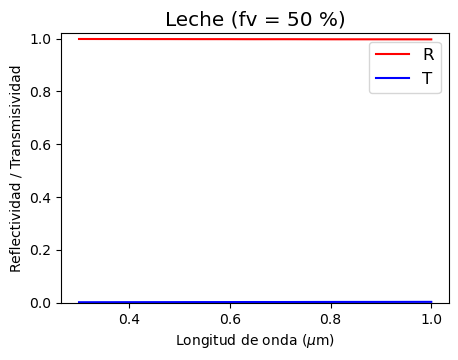

In [11]:
showplot()

Como vemos la alta concentración de partículas hace que la refletividad y transmisividad se vuelvan casi uniformes para todas las longitudes de onda. El espectro, así, toma un color blanco frente a una fuente de luz blanca.

## Referencias
- Chen G. **Chapter 5 - Energy Transfer by Waves** in *Nanoscale energy transport and conversion*, 1st Ed, Oxford University Press, 2005